# Product Dataset Cleaning & Short Title Optimization

## Objective:

### - Load the dataset and inspect the structure.
### - Perform data cleaning (handling missing values, removing duplicates, correcting column names).
### - Optimize product titles for SEO by generating short titles.
### - Save the cleaned dataset for further use.


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [35]:
# Load the dataset into a Pandas DataFrame

file_path = r"C:\Users\DELL\OkikiJESUS VsCode\Stage1- HNG12\productdata.xlsx - Sheet1.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset successfully loaded!")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

✅ Dataset successfully loaded!


## Display basic info about the dataset

In [37]:
# Display basic dataset information
print("\n🔍 Dataset Overview:")
print(df.info())


# Display the first few rows
print("\n📊 Preview of Data:")
print(df.head())


🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB
None

📊 Preview of Data:
   PRODUCTID                                              TITLE  \
0    1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1    2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2    2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3    1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4     283658  The United Empire Loyalists: A Chronicle of th...   

                             

## Check for Missing Values

In [49]:
print("\n🛠 Checking Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)


🛠 Checking Missing Values:
productid        0
title            0
bullet_points    0
description      0
producttypeid    0
productlength    0
dtype: int64


## Handling missing values (replace NaN with appropriate substitutes)

In [ ]:
# Handling missing values with correct column names
df.fillna({
    'TITLE': 'Unknown Product',
    'BULLET_POINTS': 'No details available',
    'DESCRIPTION': 'No description available',
    'PRODUCTTYPEID': -1,
    'ProductLength': df['ProductLength'].median()  # Ensure correct column name
}, inplace=True)



## Remove Duplicates


In [45]:
df.drop_duplicates(inplace=True)
print("\n✅ Duplicate Entries Removed.")


✅ Duplicate Entries Removed.


## Standardize Column Names


In [51]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\n✅ Column names standardized.")


✅ Column names standardized.


## Generate SEO-Friendly Short Titles



In [52]:
def generate_short_title(title):
    """
    Generate a concise version of the product title for SEO.
    - Keeps only the first 5 words of the product title.
    """
    words = title.split()
    return " ".join(words[:5])  # Limit to first 5 words

df['short_title'] = df['title'].apply(generate_short_title)
print("\n✅ Short titles generated.")


✅ Short titles generated.


## Save the Cleaned Dataset


In [53]:
cleaned_file_path = r"C:\Users\DELL\OkikiJESUS VsCode\Stage1- HNG12\cleaned_product_data.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"\n🎉 Data Cleaning Completed! Cleaned dataset saved at: {cleaned_file_path}")


🎉 Data Cleaning Completed! Cleaned dataset saved at: C:\Users\DELL\OkikiJESUS VsCode\Stage1- HNG12\cleaned_product_data.csv


## Verify the Cleaned Data


In [54]:
import pandas as pd

# Load the cleaned dataset
cleaned_file_path = r"C:\Users\DELL\OkikiJESUS VsCode\Stage1- HNG12\cleaned_product_data.csv"
df_check = pd.read_csv(cleaned_file_path)

# Display the first 5 rows
print(df_check.head())


   productid                                              title  \
0    1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1    2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2    2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3    1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4     283658  The United Empire Loyalists: A Chronicle of th...   

                                       bullet_points  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                               No details available   

                                         description  producttypeid  \
0                           No description available         1650.0   
1                           No description available         2755.0   
2  Specifications: Color: Red, Material: Alumin

In [55]:
# Check for missing values
print("Missing Values per Column:")
print(df_check.isnull().sum())

# Check for duplicate rows
duplicates = df_check.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicates}")


Missing Values per Column:
productid        0
title            0
bullet_points    0
description      0
producttypeid    0
productlength    0
short_title      0
dtype: int64

Total Duplicate Rows: 0


In [81]:
df.shape

(3630, 7)

## Data Insights & Visualization 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


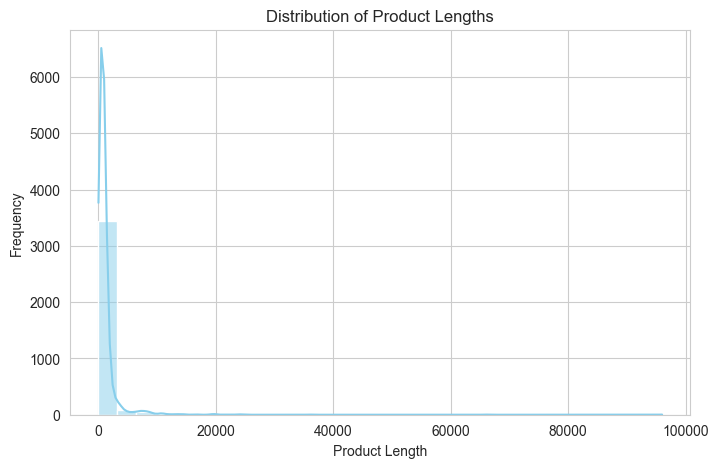

In [72]:
# Set visual style
sns.set_style("whitegrid")

# Histogram of Product Lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['productlength'], bins=30, kde=True, color='skyblue')
plt.xlabel("Product Length")
plt.ylabel("Frequency")
plt.title("Distribution of Product Lengths")
plt.show()


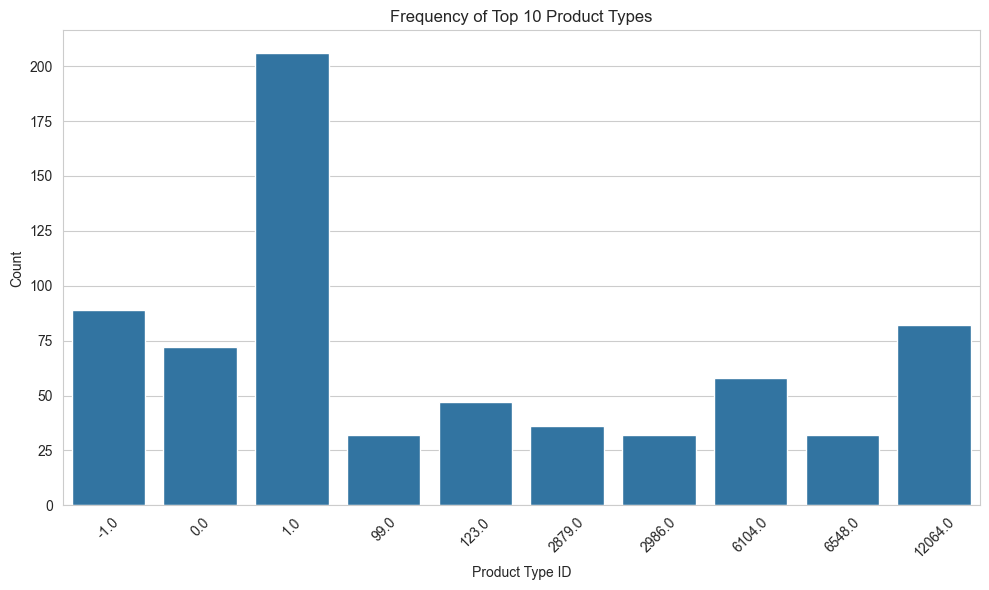

In [ ]:
# Aggregate and sort data
top_producttypes = df['producttypeid'].value_counts().head(10)  # Top 10 most common types

# Prepare data for the bar plot
data = pd.DataFrame({'ProductTypeID': top_producttypes.index, 'Count': top_producttypes.values})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='ProductTypeID', y='Count')  # No palette, no warning
plt.xlabel("Product Type ID")
plt.ylabel("Count")
plt.title("Frequency of Top 10 Product Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Word Frequency in Product Title

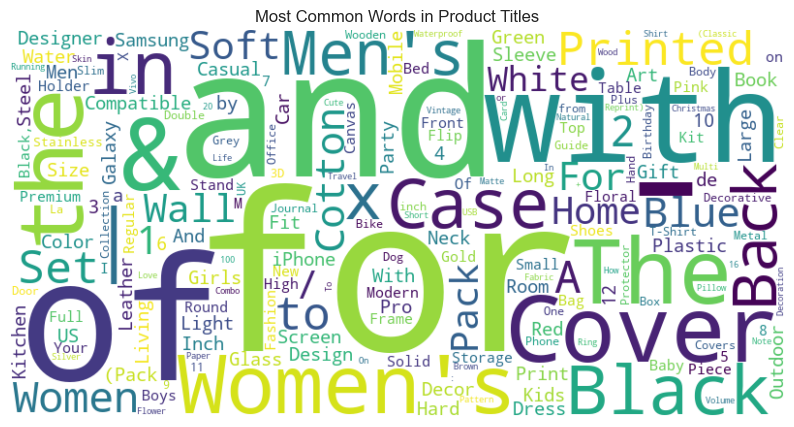

In [79]:
from collections import Counter
from wordcloud import WordCloud

# Combine all titles into one text
all_titles = " ".join(df['title'].dropna())

# Generate word frequencies
word_freq = Counter(all_titles.split())

# Create WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Product Titles")
plt.show()

In [80]:
cleaned_file_path = r"C:\Users\DELL\OkikiJESUS VsCode\Stage1- HNG12\cleaned_product__data.csv"
df.to_csv(cleaned_file_path, index=False)